In [69]:
#importing all the important libraries for the developement of the model as well as the machine learning models through the scikit learn library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [70]:
#importing the dataset in colab through the pandas library, with the encoding as encoding is in latin.
spam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding = 'latin-1')

In [71]:
#dataset before removing unnecessary columns.
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [72]:
#dropping all the unnecessary columns from the dataset using the drop function.
spam = spam.drop(labels = {'Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'}, axis = 1)

In [73]:
#datsaset after removing unnecessary columns.
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [74]:
#displaying first five rows of the dataset using the head function or method.
spam.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
#info of the dataset.
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='v1', ylabel='count'>

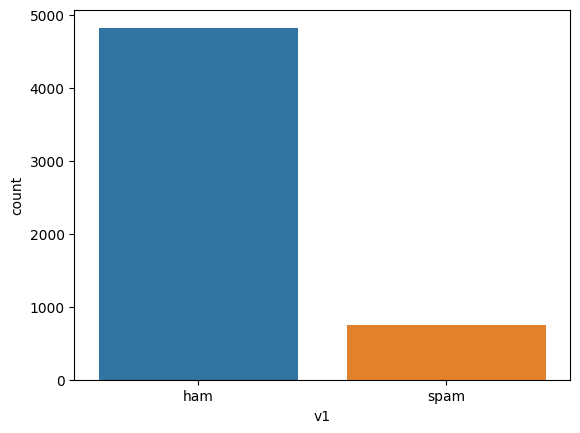

In [76]:
#countplot of target attribute giving the count of spam sms and ham sms.
sns.countplot(x = 'v1', data = spam)

In [77]:
#converting spam and ham variables into binary format.
spam['v1'] = spam['v1'].replace({'ham' : 0, 'spam' : 1})

In [78]:
#predictor column
spam['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [79]:
#using the tf-idf technique to count frequency of a particular word and to check whether that word is important or not.
sample_text = ['This is the first copy.','This is the second copy.','And this is the third one.','Is this the first copy?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_text)

In [80]:
#X has been converted to sparse matrix using the tf-idf vectorizer.
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [81]:
#displaying the values of X after converting the sparse matrix to normal array.
print(X.toarray())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.42796959 0.         0.34989318 0.         0.67049706
  0.34989318 0.         0.34989318]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [82]:
#displaying the features names of the demo sentence given above.
print(vectorizer.get_feature_names_out())

['and' 'copy' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [83]:
#now fitting the predictor attribute in the vectorizer so as to get the vectors of sms.
spam_message = vectorizer.fit_transform(spam['v2'])

In [84]:
#shape of sms after creating the vectors.
spam_message.shape

(5572, 8672)

In [85]:
##displaying the features names of the sms.
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [86]:
#displaying the array
print(spam_message.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [87]:
#dropping the v2 attribute that contains the sms and adding the vectorized attribute to the dataset.
spam.drop(['v2'], axis = 1, inplace = True)

In [88]:
#converting and adding the vectorized sms into a dataframe.
spam_ms = pd.DataFrame(spam_message.toarray())

In [89]:
#joining the dataframes.
spam = pd.concat([spam,spam_ms], axis = 1)

In [90]:
#new dataframe after combining the above two.
spam

,v1,0,1,2,3,4,5,6,7,8,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#dropping the target attribute from the predictor variable.
X = spam.drop(labels = {'v1'}, axis = 1)

In [92]:
#assigning v1 attributee to the target attribute.
y = spam['v1']

In [93]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [94]:
#splitting the dataset into training and testing set.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [95]:
#displaying the shape of the both training and testing dataset.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 8672)
(1115, 8672)
(4457,)
(1115,)


In [96]:
#imported LogisticRegression() model directly through the scikit learn library specified in cell number 1.
model1 = LogisticRegression()
model1.fit(X_train,y_train)
print("Training_Score:",model1.score(X_train, y_train)*100)
print("Testing_score :",model1.score(X_test, y_test)*100)

Training_Score: 97.44222571236257
Testing_score : 95.51569506726457


In [97]:
#imported RandomForestClassifier() model directly through the scikit learn library specified in cell number 1.
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
print("Training_Score:",model2.score(X_train, y_train)*100)
print("Testing_score :",model2.score(X_test, y_test)*100)

Training_Score: 100.0
Testing_score : 96.7713004484305


In [98]:
#imported GaussianNB() model directly through the scikit learn library specified in cell number 1.
model3 = GaussianNB()
model3.fit(X_train,y_train)
print("Training_Score:",model3.score(X_train, y_train)*100)
print("Testing_score :",model3.score(X_test, y_test)*100)

Training_Score: 94.83957819160871
Testing_score : 90.94170403587444


In [99]:
#imported Support vector Machine aka SVC() model directly through the scikit learn library specified in cell number 1.
model4 = SVC()
model4.fit(X_train, y_train)
print("Training_Score:",model4.score(X_train, y_train)*100)
print("Testing_score :",model4.score(X_test, y_test)*100)

Training_Score: 99.75319721785955
Testing_score : 97.30941704035875


In [108]:
#imported Ann through keras API and tensorflow
#ANN is just to check how the it performs on the dataset
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (8672,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [109]:
#compiled Ann model
classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [112]:
#calculating the epochs on training dataset
epochs_hist = classifier_model.fit(X_train,y_train,epochs = 5,batch_size = 125)

Epoch 1/5
36/36 [==============================] - 1s 38ms/step - loss: 1.2323e-05 - accuracy: 1.0000
Epoch 2/5
36/36 [==============================] - 1s 41ms/step - loss: 9.7377e-06 - accuracy: 1.0000
Epoch 3/5
36/36 [==============================] - 1s 25ms/step - loss: 9.5505e-06 - accuracy: 1.0000
Epoch 4/5
36/36 [==============================] - 1s 24ms/step - loss: 6.2369e-06 - accuracy: 1.0000
Epoch 5/5
36/36 [==============================] - 1s 23ms/step - loss: 5.8752e-06 - accuracy: 1.0000


In [113]:
#calculating the epochs on testing dataset
epochs_hist = classifier_model.fit(X_test,y_test,epochs = 5,batch_size = 125)

Epoch 1/5
9/9 [==============================] - 0s 48ms/step - loss: 0.1076 - accuracy: 0.9767
Epoch 2/5
9/9 [==============================] - 0s 52ms/step - loss: 0.0117 - accuracy: 0.9973
Epoch 3/5
9/9 [==============================] - 0s 47ms/step - loss: 9.9153e-04 - accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 1s 69ms/step - loss: 8.3358e-04 - accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 1s 67ms/step - loss: 5.0011e-04 - accuracy: 1.0000


In [114]:
#finding out the keys of epochs
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

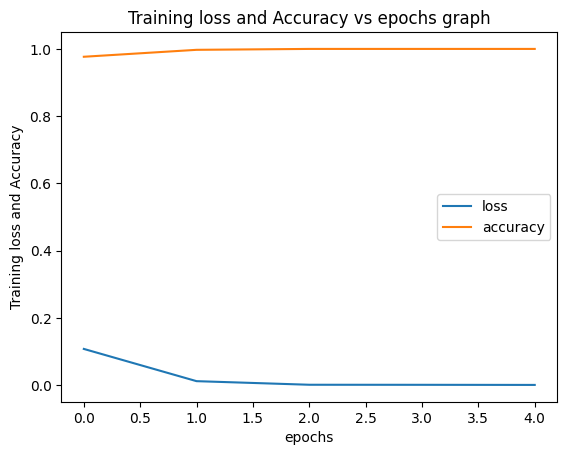

In [124]:
#plotting the graph between the training loss and accuracy vs number epochs.
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['accuracy']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and Accuracy vs epochs graph')
plt.xlabel('epochs')
plt.ylabel('Training loss and Accuracy')
plt.legend({'accuracy', 'loss'})

In [116]:
#evaluating the model on the testing dataset.
evaluation = classifier_model.evaluate(X_test,y_test)
print('test accuracy:{}'.format(evaluation[1]))

35/35 [==============================] - 1s 9ms/step - loss: 1.2970e-04 - accuracy: 1.0000
test accuracy:1.0


In [101]:
#model4 is SVM()
y_predict = model4.predict(X_test)

In [102]:
print(y_predict)

[1 1 0 ... 0 0 1]


In [117]:
#filtering those values greater than 0.5 in testing dataset.
y_predict = (y_predict > 0.5)
y_predict

array([ True,  True, False, ..., False, False,  True])

In [118]:
#model4 is SVM()
y_train_predict = model4.predict(X_train)

In [119]:
print(y_train_predict)

[0 0 0 ... 1 0 1]


In [120]:
#filtering those values greater than 0.5 in testing dataset.
y_train_predict = (y_train_predict > 0.5)
y_train_predict

array([False, False, False, ...,  True, False,  True])

<Axes: >

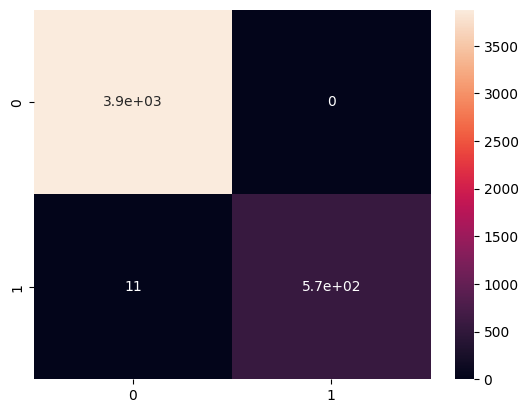

In [121]:
#plotting the confusion matrix of training dataset
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, annot = True)

<Axes: >

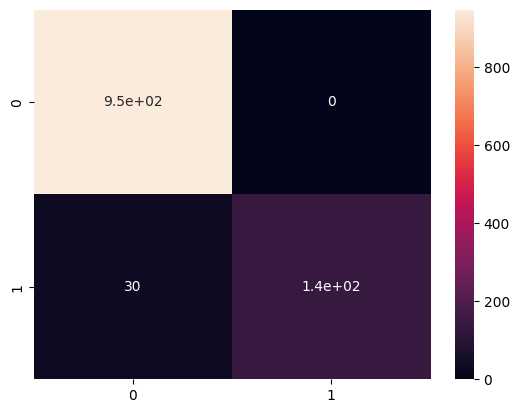

In [122]:
#plotting the confusion matrix of testing dataset
cm2 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm2, annot = True)

In [123]:
#printing the classification report of training and testing dataset
print("Training Report:\n",classification_report(y_train,y_train_predict))
print("Testing Report:\n",classification_report(y_test, y_predict))

Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3878
           1       1.00      0.98      0.99       579

    accuracy                           1.00      4457
   macro avg       1.00      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457

Testing Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       947
           1       1.00      0.82      0.90       168

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

